In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import math

init_notebook_mode(connected=True)

data_path = "res/YearPredictionMSD.txt"
result_folder = "results/"

In [15]:
df_data = pd.read_csv(data_path, header=None)
df_data.columns = ['year'] + ['timbre_avg' + str(i) for i in range(1,13)] + ['timbre_cov' + str(i) for i in range(1,79)]
# What is timbre? refer to http://docs.echonest.com.s3-website-us-east-1.amazonaws.com/_static/AnalyzeDocumentation.pdf
df_data.head(10)

,year,timbre_avg1,timbre_avg2,timbre_avg3,timbre_avg4,timbre_avg5,timbre_avg6,timbre_avg7,timbre_avg8,timbre_avg9,...,timbre_cov69,timbre_cov70,timbre_cov71,timbre_cov72,timbre_cov73,timbre_cov74,timbre_cov75,timbre_cov76,timbre_cov77,timbre_cov78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,2001,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,2001,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,2001,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,2007,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


In [4]:
# split up according to dataset description (i.e. 'producer effect' is avoided)
df_train = df_data.loc[:463715,:]
df_test = df_data.loc[463715:,:]

In [17]:
df_data.describe()

,year,timbre_avg1,timbre_avg2,timbre_avg3,timbre_avg4,timbre_avg5,timbre_avg6,timbre_avg7,timbre_avg8,timbre_avg9,...,timbre_cov69,timbre_cov70,timbre_cov71,timbre_cov72,timbre_cov73,timbre_cov74,timbre_cov75,timbre_cov76,timbre_cov77,timbre_cov78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


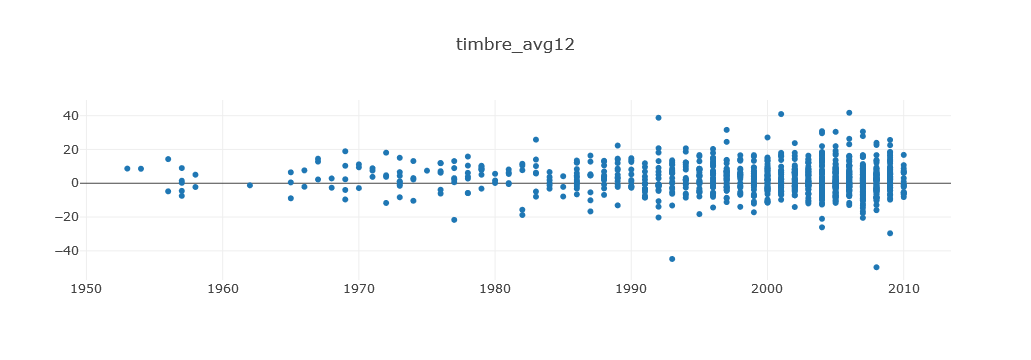

In [38]:
df_sample = df_train.sample(1000, random_state=120438)

prop = 'timbre_avg12'

trace = go.Scatter(
    x = df_sample['year'],
    y = df_sample[prop],
    mode = 'markers'
)

layout = go.Layout(
    title = prop
)

py.iplot(go.Figure(data = [trace], layout=layout))

## Baseline (always mean year)

In [47]:
pred = df_train['year'].median()
base_mse = mean_squared_error(df_test['year'], [pred for x in df_test['year']])
print("Baseline MSE: " + str(base_mse))
print("RMSE: " + str(math.sqrt(base_mse)))

Baseline MSE: 130.04365678868874
RMSE: 11.403668567118597


### Initialize Training data

In [48]:
df_vars = df_train.loc[:, df_train.columns != 'year']
df_class = df_train['year']

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=test_set_ratio, random_state=0)

In [59]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
scores = cross_validate(reg, df_vars, df_class, cv=10, scoring='neg_mean_squared_error')
scores

E:\Python\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



{'fit_time': array([3.35913444, 3.17164826, 2.7029326 , 2.95291471, 2.79667521,
        2.76542735, 2.76542664, 3.3122654 , 3.93721795, 3.31226325]),
 'score_time': array([0.01562572, 0.01562476, 0.01562428, 0.03124809, 0.0624969 ,
        0.01562715, 0.01562643, 0.01562262, 0.03125215, 0.01562548]),
 'test_score': array([-87.91932093, -96.74794639, -89.25683172, -91.73925285,
        -92.33559424, -92.68895704, -92.82303468, -86.41194249,
        -96.49430302, -88.01818909]),
 'train_score': array([-91.63732249, -90.66176965, -91.48697235, -91.2090219 ,
        -91.1501166 , -91.11055676, -91.09507183, -91.80502951,
        -90.68663741, -91.62480126])}

### Simple cross validation for well-founded results

In [4]:
scores = cross_validate(clf, df_vars, df_class, cv=5)
scores['test_score']

# dt criterion=gini
# array([0.93854749, 0.9408284 , 0.93125   , 0.90728477, 0.96453901])

E:\Python\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
E:\Python\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.48883990073937794

### Hyper-parameter tuning

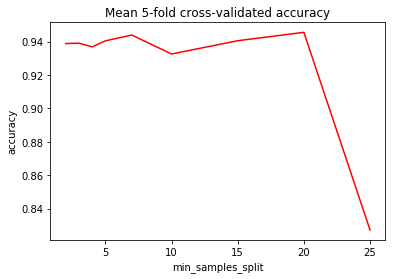

In [37]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Neat hyperparameter evaluation

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



0 --- 1e-05
[0.08379888 0.06508876 0.075      0.05298013 0.06382979]
1 --- 0.0001
[0.51955307 0.50295858 0.5625     0.53642384 0.54609929]
2 --- 0.001
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
3 --- 0.01
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
4 --- 0.1
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
5 --- 1
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
6 --- 10
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
7 --- 100
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
8 --- 1000
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]


E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



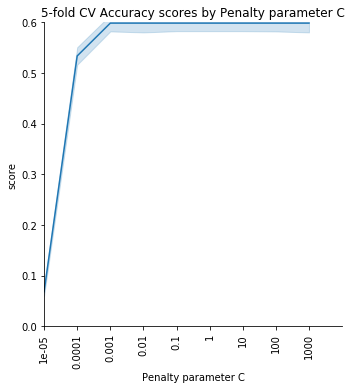

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_vars = preprocessing.scale(df_vars)
df_class = df_train['Class']

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf = SVC(kernel="linear", C=c)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("5-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

0 --- 2
Train [1. 1. 1. 1. 1.]
Test [0.37430168 0.33136095 0.40625    0.33774834 0.43262411]
1 --- 3
Train [0.93880837 0.93819334 0.9484375  0.94453005 0.94233687]
Test [0.34636872 0.36686391 0.3625     0.37086093 0.40425532]
2 --- 5
Train [0.8921095  0.8858954  0.9015625  0.88135593 0.88467375]
Test [0.36312849 0.36686391 0.39375    0.35761589 0.37588652]
3 --- 10
Train [0.79710145 0.79397781 0.8109375  0.78428351 0.81638847]
Test [0.3575419  0.35502959 0.4125     0.35761589 0.41134752]
4 --- 25
Train [0.6747182  0.65451664 0.6515625  0.62095532 0.68133536]
Test [0.36871508 0.37869822 0.3875     0.35761589 0.39007092]
5 --- 50
Train [0.568438   0.54833597 0.55625    0.52696456 0.53262519]
Test [0.34078212 0.34319527 0.375      0.33774834 0.40425532]
6 --- 100
Train [0.46698873 0.40095087 0.4140625  0.42526965 0.41274659]
Test [0.30726257 0.31360947 0.35       0.31125828 0.41134752]
7 --- 200
Train [0.30917874 0.34706815 0.3296875  0.32665639 0.30349014]
Test [0.25698324 0.27218935 0.3

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



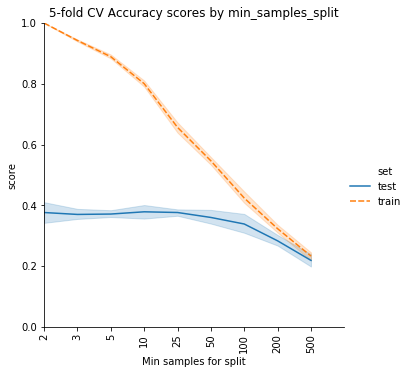

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [2,3,5,10,25,50,100,200,500]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(min_samples_split=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Min samples for split")
plt.title("5-fold CV Accuracy scores by min_samples_split")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mss_eval.pdf')
plt.show()

0 --- 0.01
Train [1. 1. 1. 1. 1.]
Test [0.20111732 0.16568047 0.1875     0.21854305 0.14893617]
1 --- 0.1
Train [1. 1. 1. 1. 1.]
Test [0.36312849 0.33727811 0.34375    0.39072848 0.32624113]
2 --- 0.25
Train [1. 1. 1. 1. 1.]
Test [0.31284916 0.31360947 0.36875    0.33774834 0.40425532]
3 --- 0.5
Train [1. 1. 1. 1. 1.]
Test [0.34078212 0.34319527 0.33125    0.33774834 0.46808511]
4 --- 0.75
Train [1. 1. 1. 1. 1.]
Test [0.38547486 0.35502959 0.3875     0.39072848 0.39007092]
5 --- None
Train [1. 1. 1. 1. 1.]
Test [0.37430168 0.33136095 0.40625    0.33774834 0.43262411]


E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



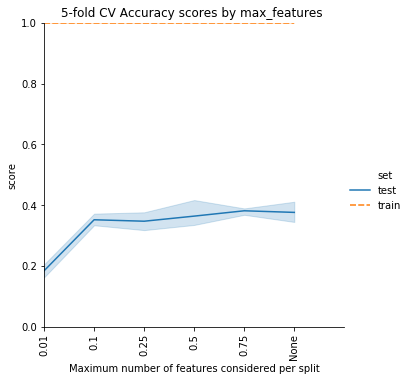

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [0.01, 0.1, 0.25, 0.5, 0.75, None]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(max_features=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Maximum number of features considered per split")
plt.title("5-fold CV Accuracy scores by max_features ")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mf_eval.pdf')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [0.01, 0.1, 0.25, 0.5, 0.75, None]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(max_features=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Maximum number of features considered per split")
plt.title("5-fold CV Accuracy scores by max_features ")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mf_eval.pdf')
plt.show()

### Scaled / Non-Scaled comparison

In [7]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_vars_scaled = preprocessing.scale(df_vars)
df_class = df_train['Class']

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

for name, clf in zip(names, classifiers):
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(name, "Unscaled", scores.mean())
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars_scaled, df_class, cv=5)['test_score']
    print(name, "Scaled", scores.mean())

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Nearest Centroid Unscaled 0.22794987191154314
Nearest Centroid Scaled 0.6083086395982383
Linear SVM Unscaled 0.5190677786666922
Linear SVM Scaled 0.5983495837320977
Decision Tree Unscaled 0.3849839828100602
Decision Tree Scaled 0.38356554309374813
Naive Bayes Unscaled 0.33543017279437287
Naive Bayes Scaled 0.4303194954995865


### Model fitting and sample testing

In [49]:
model = clf.fit(X_train, y_train)
model.score(X_test, y_test)

0.925

### Final prediction

In [50]:
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = pd.Series(model.predict(df_test))
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


### Export

In [ ]:
export_file_name = result_folder + "svm_linear.csv"
df_res.to_csv(export_file_name, index=False)

### Easy comparison

In [5]:
import traceback
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)


df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

#df_vars = KNN(k=3).fit_transform(df_vars)

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

cl_scores = {}
df_vars = preprocessing.scale(df_vars_all)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, df_vars, df_class, cv=10, scoring=scoring, return_train_score=True)
        cl_scores[name] = scores
        for score in scoring:
            print(name,"--",score,"-- Training Set --", "Mean", scores['train_'+score].mean(), "-- Min", scores['train_'+score].min(), "-- Max", scores['train_'+score].max())
            print(name,"--",score,"-- Test Set --", "Mean", scores['test_'+score].mean(), "-- Min", scores['test_'+score].min(), "-- Max", scores['test_'+score].max())
    except:
        print("Classification failed for", name)
        traceback.print_exc()

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Nearest Centroid -- acc -- Training Set -- Mean 0.9740225828033011 -- Min 0.9701492537313433 -- Max 0.9775596072931276
Nearest Centroid -- acc -- Test Set -- Mean 0.6280452100034309 -- Min 0.5567010309278351 -- Max 0.7428571428571429
Nearest Centroid -- prec_macro -- Training Set -- Mean 0.9888808036646273 -- Min 0.9873153153153154 -- Max 0.99
Nearest Centroid -- prec_macro -- Test Set -- Mean 0.6019111832611832 -- Min 0.5094444444444445 -- Max 0.6863333333333332
Nearest Centroid -- rec_macro -- Training Set -- Mean 0.9731216781584429 -- Min 0.9695506356388711 -- Max 0.9763717948717948
Nearest Centroid -- rec_macro -- Test Set -- Mean 0.6203333333333334 -- Min 0.55 -- Max 0.72
Linear SVM -- acc -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- acc -- Test Set -- Mean 0.617778398775634 -- Min 0.5555555555555556 -- Max 0.7428571428571429
Linear SVM -- prec_macro -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- prec_macro -- Test Set -- Mean 0.5811802752802753

### all features
Nearest Centroid -- Training Set -- Mean 0.7496791822186778 -- Min 0.7279005524861878 -- Max 0.7724039829302988
Nearest Centroid -- Test Set -- Mean 0.6628582456264915 -- Min 0.5873015873015873 -- Max 0.7543859649122807
Linear SVM -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- Test Set -- Mean 0.9560670435070409 -- Min 0.9191919191919192 -- Max 1.0
Decision Tree -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Decision Tree -- Test Set -- Mean 0.9458952341983844 -- Min 0.9 -- Max 1.0
Naive Bayes -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Naive Bayes -- Test Set -- Mean 0.35593122949313594 -- Min 0.2727272727272727 -- Max 0.42857142857142855

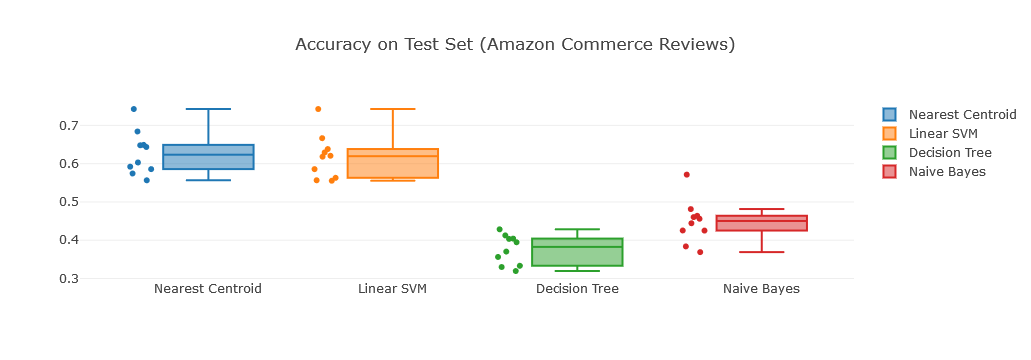

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    E:\Python\Miniconda3
    E:\Python\Miniconda3\Library\mingw-w64\bin
    E:\Python\Miniconda3\Library\usr\bin
    E:\Python\Miniconda3\Library\bin
    E:\Python\Miniconda3\Scripts
    E:\Python\Miniconda3\bin
    C:\Rtools\bin
    C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin
    C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\libnvvp
    E:\Program Files (x86)\NVIDIA\dev\bin
    E:\Program Files (x86)\NVIDIA\dev\libnvvp
    C:\Program Files\Java\jdk1.8.0_66\bin
    C:\ProgramData\Oracle\Java\javapath
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    C:\Users\Martin\AppData\Local\Android\sdk\tools
    C:\Users\Martin\AppData\Local\Android\sdk\platform-tools
    E:\Program Files (x86)\MySQL\MySQL Utilities\
    E:\Program Files (x86)\MySQL\MySQL Utilities\Doctrine extensions for PHP\
    E:\Program Files (x86)\GTK2-Runtime\bin
    E:\Program Files\Git\cmd
    E:\Program Files (x86)\GNU\GnuPG\pub
    C:\Program Files (x86)\GnuWin32\bin
    C:\Program Files\dotnet\
    C:\Program Files (x86)\Skype\Phone\
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\Program Files\Microsoft SQL Server\130\Tools\Binn\
    F:\Program Files\GTK3-Runtime Win64\bin
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    G:\npm\nodejs\
    G:\spark\spark-2.3.0-bin-hadoop2.7\bin
    
    C:\WINDOWS\System32\OpenSSH\
    E:\Python\Python36\Scripts\
    E:\Python\Python36\
    E:\Program Files\python\Scripts\
    E:\Program Files\python\
    E:\Program Files (x86)\MikTex\miktex\bin\x64\
    E:\INSTALL-FILES\apache-ant-1.9.6-bin\apache-ant-1.9.6\bin
    C:\Users\Martin\AppData\Local\atom\bin
    E:\INSTALL-FILES\office-tools\crark51
    E:\Program Files (x86)\MySQL\MySQL Utilities
    E:\Program Files (x86)\apache-maven-3.3.9-bin\apache-maven-3.3.9\bin
    C:\Program Files (x86)\GnuWin32\bin
    E:\sdk\android\sdk1\platform-tools
    E:\Program Files (x86)\Visual Studio\2017\Professional\VC\Tools\MSVC\14.11.25503\bin\Hostx64\x64
    E:\Python\Miniconda3
    E:\Program Files (x86)\Graphviz2.38\bin
    C:\Program Files (x86)\Windows Kits\8.1\Lib\winv6.3\um\x64
    C:\Users\Martin\AppData\Local\Microsoft\WindowsApps
    C:\Users\Martin\AppData\Roaming\npm
    C:\RBuildTools\3.3\bin
    C:\RBuildTools\3.3\gcc-4.6.3\bin
    E:\INSTALL-FILES\apache-jena-3.8.0\apache-jena-3.8.0\bat
    

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca.

After installation is complete, no further configuration should be needed. 

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save() 

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [7]:
import plotly.io as pio
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_acc'],
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="Accuracy on Test Set (Amazon Commerce Reviews)")
    
py.iplot(go.Figure(data=traces, layout=layout))
pio.write_image(go.Figure(data=traces, layout=layout), 'amz_boxplot.pdf')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_vars.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
trace = []
names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]
feature_counts = [1,2,5,10,20,30,40,50,100,500,1000,10000]#, "All"]
for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_score']:
            trace.append({'score': score, 'x':idx, 'name':feature_count, 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



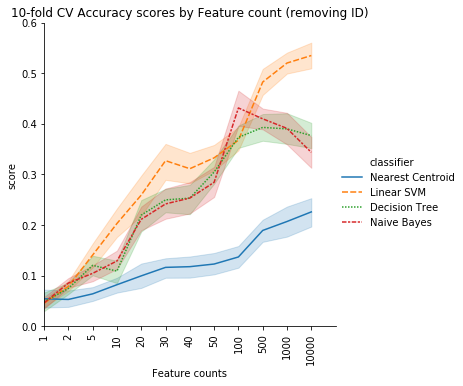

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="x", y="score", kind="line", hue="classifier", style="classifier", data=df_trace)
plt.xticks(range(len(feature_counts)), feature_counts, rotation='vertical')
plt.xlabel("Feature counts")
plt.title("10-fold CV Accuracy scores by Feature count (removing ID)")
axes = plt.gca()
axes.set_ylim([0.0,0.6])
axes.set_xlim([0,len(feature_counts)])
plt.savefig('feature_cnt_eval_wo_ID.pdf')
plt.show()

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
#df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']
selector = SelectKBest(chi2, k=1)
selector.fit(df_vars_all, df_class)
cols = selector.get_support(indices=True)
best_features = df_vars_all.columns[cols]
#df_vars = SelectKBest(chi2, k=1).fit_transform(df_vars_all, df_class)
best_features

Index(['ID'], dtype='object')

In [4]:
df_train.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V9992', 'V9993', 'V9994', 'V9995', 'V9996', 'V9997', 'V9998', 'V9999',
       'V10000', 'Class'],
      dtype='object', length=10002)

In [68]:
class_labels = sorted(df_train['Class'].unique(), key=lambda s: s.lower())
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = df_test['ID'].apply(lambda x: class_labels[(x-1)//30])
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


In [69]:
export_file_name = result_folder + "id_prediction.csv"
df_res.to_csv(export_file_name, index=False)